# Manutenzione Predittiva di Macchine Automatiche
### Ci concentreremo sulla creazione di un modello predittivo per identificare potenziali guasti in macchine automatiche basandoci su un esempio di banca dati. L'obiettivo è dimostrare come tecniche di machine learning possano essere applicate per migliorare la manutenzione e prevenire fermi macchina.

** coesia machinary
<center><img src="assets/immagineIntro.png" width="100%"/></center>

## Manutenzione predittiva di macchine automatiche
**Some context information:**
* Coesia is a producer of automatic machines for various markets. It stands out for its high technology and performance guaranteed to the customer. The market is increasingly asking to develop services around our products. For this reason, one of the most relevant aspects to address when talking about AI applied to Coesia's product concerns the service and, in particular, predictive maintenance. To discuss maintenance, it is necessary to think about how to collect data and how to create a benefit for the customer in data collection, which at the moment could be the biggest obstacle. Indeed, most customers are reluctant to leave a data collection channel open because it could be seen as "sticking their nose into their business." We need to transform this need of ours into value for the customer. Our machines should be designed integrating IoT (Internet of Things) to allow the collection and analysis of huge amounts of data from sensors installed on the machines. Through the processing of this data, it is possible to identify patterns that precede failures or malfunctions, allowing proactive intervention for maintenance, thereby reducing unplanned machine downtimes. Another challenge for COESIA should be to make "standard" parts or functions of the machine so that the collected data can be consistent and reapplicable to various types of machines. If every machine is different from the others, it could take years before having a database usable for an AI. It will not be enough to collect data, but also to create a work team that can clean and integrate it with information collected from the customer. For example, it is necessary to know when a customer performs maintenance and replaces spare parts to keep track of it within the data. In addition, there may be cases where the customer independently tampers with parts of the machine or uses non-original parts. This could compromise the quality of the data. For this reason, on-site monitoring at the customer's location is essential.
    

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


## A Look at the Data

**Let's have a look at the available data**

is just an example of data coming from IoT

In [12]:
# Generazione di un set di dati fittizio
np.random.seed(42)
data = {
    'Temperatura': np.random.normal(100, 10, 1000),
    'Vibrazione': np.random.normal(0.5, 0.1, 1000),
    'Rumore': np.random.normal(50, 5, 1000),
    'DurataFunzionamento': np.random.randint(1, 1000, 1000),
    'Guasto': np.random.choice([0, 1], 1000, p=[0.95, 0.05])
}
df = pd.DataFrame(data)


In [13]:
# Mostra le prime 5 righe del DataFrame
df.head()


,Temperatura,Vibrazione,Rumore,DurataFunzionamento,Guasto
0,104.967142,0.639936,46.624109,438,0
1,98.617357,0.592463,49.277407,732,0
2,106.476885,0.505963,46.037900,890,0
3,115.230299,0.435306,48.460192,606,0
4,97.658466,0.569822,40.531927,457,0


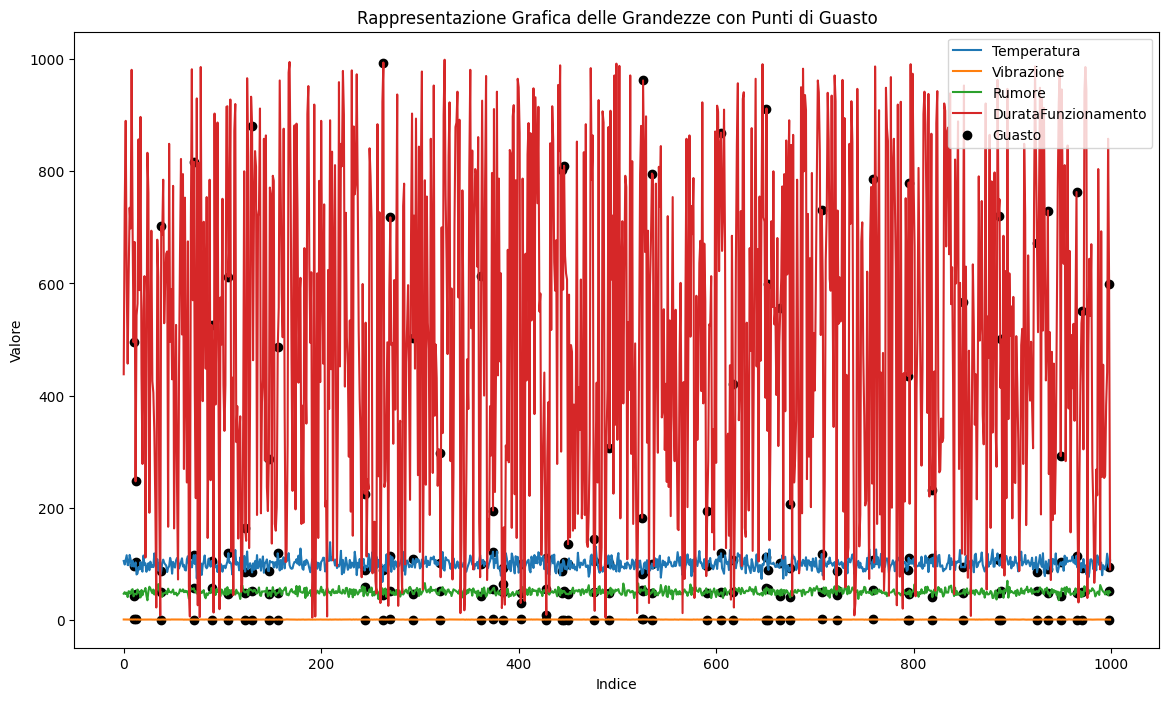

In [21]:
import matplotlib.pyplot as plt

# Imposta la dimensione della figura
plt.figure(figsize=(14, 8))

# Cicla attraverso le colonne, escludendo 'Guasto'
for column in df.drop('Guasto', axis=1).columns:
    plt.plot(df.index, df[column], label=column)

# Trova gli indici dove avvengono i guasti
guasti_idx = df[df['Guasto'] == 1].index

# Per ogni grandezza, evidenzia i punti di guasto
for column in df.drop('Guasto', axis=1).columns:
    plt.scatter(guasti_idx, df.loc[guasti_idx, column], color='black', label='Guasto' if column == df.drop('Guasto', axis=1).columns[0] else "", marker='o')

# Aggiungi una legenda
plt.legend()

# Aggiungi titoli agli assi e al grafico
plt.xlabel('Indice')
plt.ylabel('Valore')
plt.title('Rappresentazione Grafica delle Grandezze con Punti di Guasto')

# Mostra il grafico
plt.show()



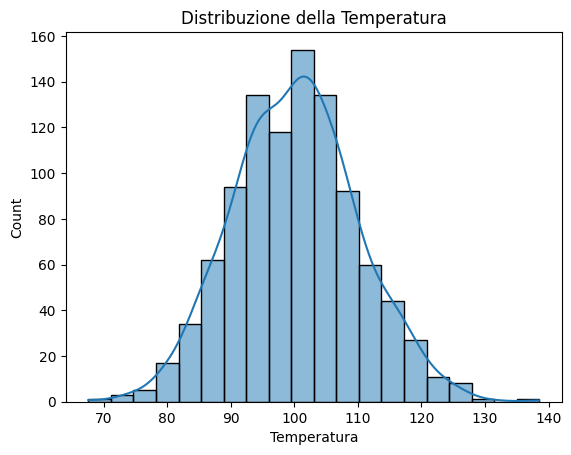

In [14]:
sns.histplot(df['Temperatura'], bins=20, kde=True)
plt.title('Distribuzione della Temperatura')
plt.show()


In [6]:
X = df.drop('Guasto', axis=1)
y = df['Guasto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [8]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, zero_division=1))



              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       1.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.98      0.50      0.49       200
weighted avg       0.97      0.97      0.96       200

